In [1]:
from keras.datasets import cifar100

In [3]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_test.shape

(10000, 1)

In [4]:
import matplotlib.pyplot as plt

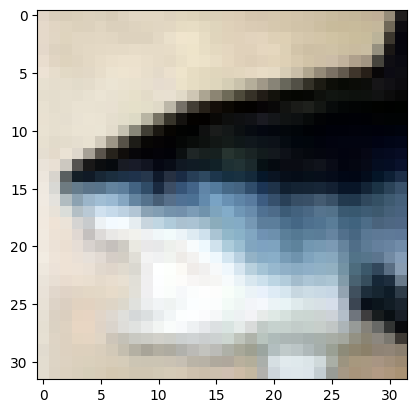

In [13]:
image = x_train[7942]
plt.imshow(image,cmap=plt.cm.binary)
plt.show()

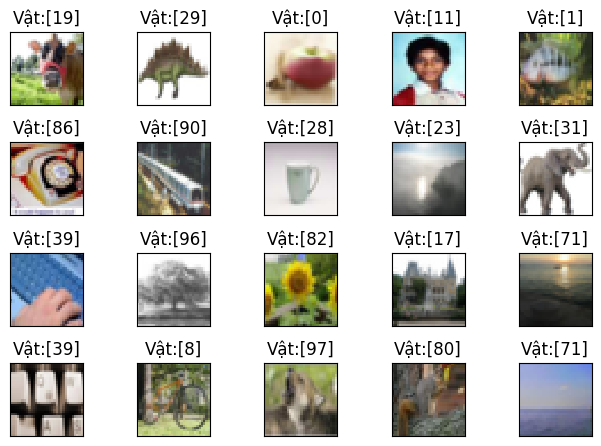

In [7]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap = 'gray',
             interpolation = 'none')
  plt.title('Vật:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [12]:
from keras import models
from keras.layers import Dense

In [14]:
from keras.models import Sequential

In [16]:
model = Sequential()

In [17]:
from keras.layers.serialization import activation
model.add(Dense(5120, activation = 'relu',input_shape = (32*32*3,)))
model.add(Dense(2500, activation = 'relu'))
model.add(Dense(1200, activation = 'relu'))
model.add(Dense(650, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(100,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5120)              15733760  
                                                                 
 dense_1 (Dense)             (None, 2500)              12802500  
                                                                 
 dense_2 (Dense)             (None, 1200)              3001200   
                                                                 
 dense_3 (Dense)             (None, 650)               780650    
                                                                 
 dense_4 (Dense)             (None, 512)               333312    
                                                                 
 dense_5 (Dense)             (None, 100)               51300     
                                                                 
Total params: 32,702,722
Trainable params: 32,702,722
No

In [18]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

In [19]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [20]:
from keras.utils import to_categorical #ONE HOT ENCODING

In [21]:
y_train = to_categorical(y_train,100)

In [22]:
y_test = to_categorical(y_test,100)

In [23]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(x_train,y_train,epochs = 10, batch_size = 128)

Epoch 1/10
391/391 [==============================] - 338s 859ms/step - loss: 4.4513 - accuracy: 0.0317
Epoch 2/10
391/391 [==============================] - 331s 848ms/step - loss: 4.0654 - accuracy: 0.0689
Epoch 3/10
391/391 [==============================] - 332s 850ms/step - loss: 3.8973 - accuracy: 0.0957
Epoch 4/10
391/391 [==============================] - 334s 855ms/step - loss: 3.7418 - accuracy: 0.1219
Epoch 5/10
391/391 [==============================] - 334s 854ms/step - loss: 3.6151 - accuracy: 0.1456
Epoch 6/10
391/391 [==============================] - 336s 860ms/step - loss: 3.5164 - accuracy: 0.1634
Epoch 7/10
391/391 [==============================] - 335s 856ms/step - loss: 3.4195 - accuracy: 0.1793
Epoch 8/10
391/391 [==============================] - 336s 860ms/step - loss: 3.3452 - accuracy: 0.1924
Epoch 9/10
391/391 [==============================] - 335s 858ms/step - loss: 3.2708 - accuracy: 0.2056
Epoch 10/10
391/391 [==============================] - 335s 858m

In [25]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 26s 83ms/step - loss: 3.4284 - accuracy: 0.1941


In [26]:
print('Ham mat mat tren tap kiem tra: ',test_loss)
print('Do chinh xac tren tap kiem tra: ',test_acc*100,'%')

Ham mat mat tren tap kiem tra:  3.4283506870269775
Do chinh xac tren tap kiem tra:  19.41000074148178 %


In [27]:
model.save('model_cifar100_1.h5')

In [29]:
from keras.saving.legacy.save import load_model
model11 = load_model('model_cifar100_1.h5')

In [30]:
from keras.utils import load_img
import cv2 as cv
import numpy as np

In [31]:
from keras.utils.image_utils import img_to_array

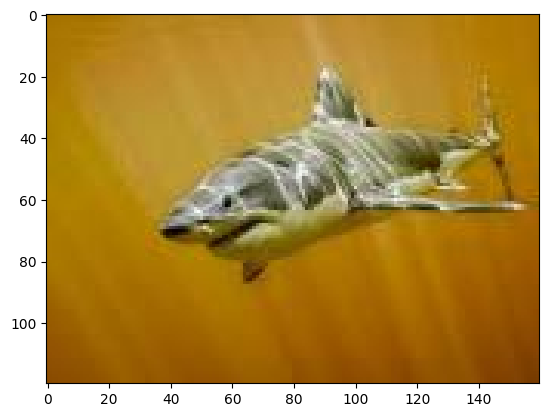

In [40]:
url = 'shark_test.jpg'
test_img = cv.imread(url)
plt.imshow(test_img)

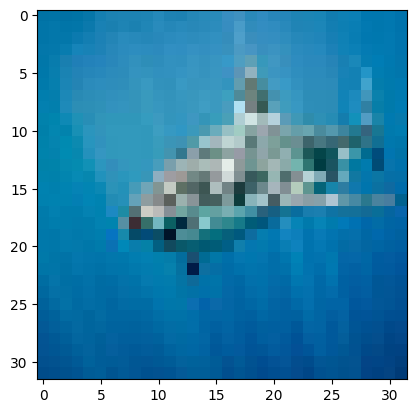

In [41]:
img = load_img(url,color_mode = 'rgb',target_size=(32,32))
plt.imshow(img)

In [42]:
img = img_to_array(img)

In [43]:
img.size

3072

In [44]:
img = img.reshape(1,32*32*3)

In [45]:
img = img.astype('float32')

In [46]:
img = img/255

In [47]:
np.argmax(model11.predict(img),axis=1)

1/1 [==============================] - 0s 50ms/step


array([93])